# Итоговая работа

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import Image
from scipy import stats
import seaborn as sns

from scipy.optimize import differential_evolution

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [83]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [108]:
def cosine(a, b):
    """
    Подсчет косинуса угла между векторами a и b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    
    return np.dot(a, b) / (aLength * bLength)  

for k, j in enumerate(raitings):    
    cosine_list = [(i, cosine(a, j)) for i, a in enumerate(raitings) if k != i]
    cosine_metric = (k+1, max(cosine_list, key = lambda x: x[1])[0]+1)
    print(cosine_metric)    

(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


In [ ]:
Чтобы приблизить нашу матрицу raitings матрицей меньшего ранга (нам нужно оставить 5 признаков из 15), 
используем сингулярное разложение, где полученные матрицы обрезаем до 5 столбцов

In [176]:
U, S, V = np.linalg.svd(raitings, full_matrices=False)
S = S[:5]
U[:, :5]@np.diag(S)@V[:5, :5]

array([[ 1.87714353,  6.41126887,  7.05045587,  6.47383192,  4.67524539],
       [ 8.47218818,  2.54514441,  5.55092788,  9.47008358,  6.66745215],
       [ 2.68479305,  3.95864181,  8.73709327,  6.80481999,  4.288088  ],
       [ 6.54449207,  2.65799371,  7.76817933,  7.97515383,  5.2821603 ],
       [ 4.29012286,  5.45203499,  3.41606541,  4.86724143,  6.55299609],
       [ 6.32112432,  3.67971799,  5.64141602,  4.1373237 ,  7.81175229],
       [ 8.41321307,  4.8544321 ,  4.99899382,  7.1314049 ,  7.75507973],
       [ 5.97648144,  4.52884341,  5.27968558,  4.74766513,  7.07966242],
       [ 2.72985484,  8.28115267,  6.57638375,  5.34799457,  6.92662199],
       [ 4.18209394,  7.53862943, 10.13627971,  6.72606247,  7.93915124]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [7]:
x = sym.Symbol('x')
d1 = sym.diff((sym.tan(sym.sin(x)+sym.cos(2*x+3)))**2, x, 1)
d1.subs(x, 1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

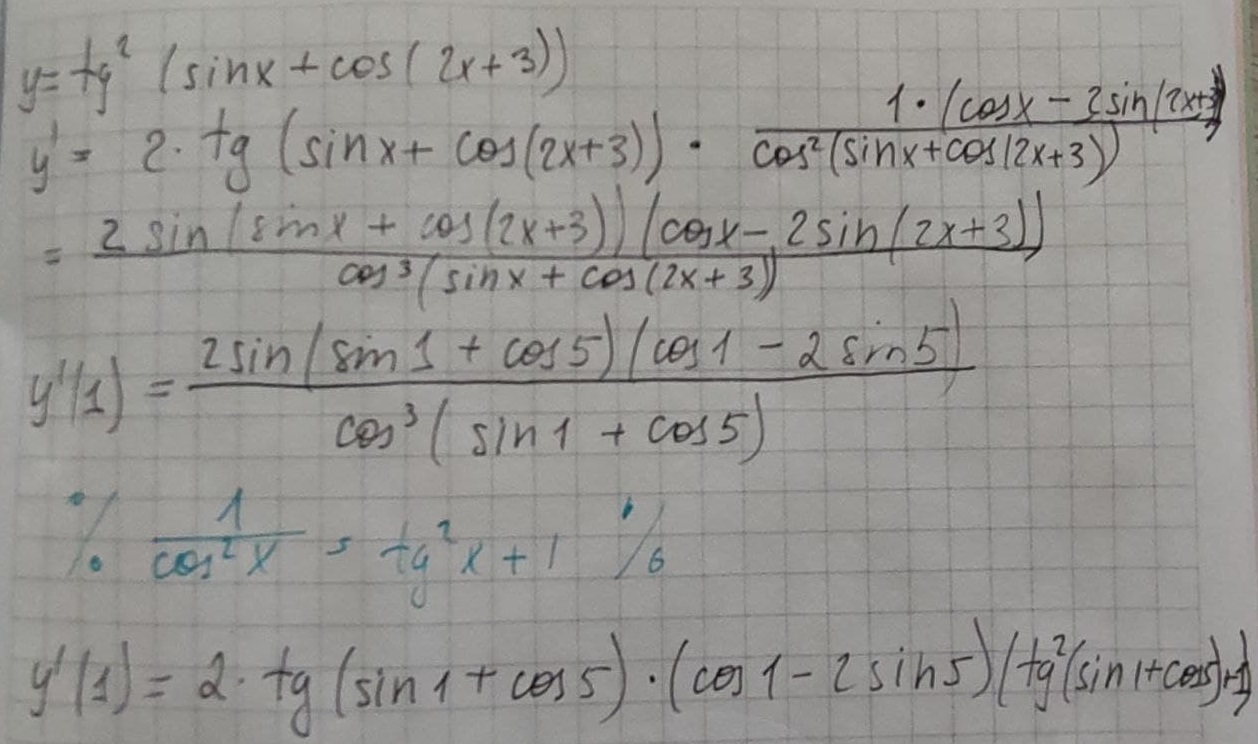

In [11]:
Image(filename = "task_2.jpg", width=500, height=400)

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [12]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [13]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [14]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

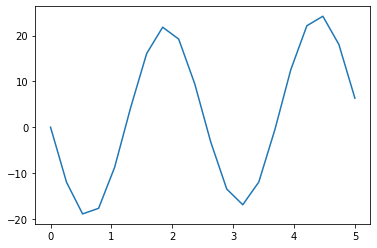

In [15]:
plt.plot(x, fx)
plt.show()

In [29]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [20]:
bounds = [(-10., 10.), (-10., 10.)]
res = differential_evolution(error, bounds, seed=21, 
        strategy='best1bin',  popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate')
res

     fun: 1.5131311013050208e-06
 message: 'Optimization terminated successfully.'
    nfev: 2223
     nit: 71
 success: True
       x: array([ 3. , -2.5])

оптимальные значения a=3 и b=-2.5

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [45]:
my = stats.rv_discrete(
    name = 'disc_values',
    values = ([-5, -3, -1, 0, 2, 4, 6, 8, 11, 13, 15, 17, 19, 20, 22, 24, 26, 28, 31, 33],
              [0.1, 0.1, 0.1, 0.2, 0.02, 0.03, 0.03, 0.015, 0.025, 0.025, 0.025, 0.025, 
               0.025, 0.05, 0.05, 0.05, 0.05, 0.05, 0.025, 0.005])
)

<AxesSubplot:ylabel='Count'>

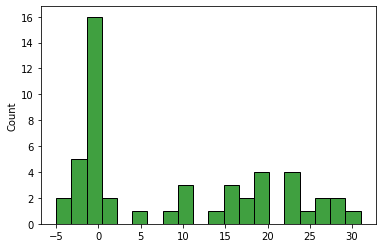

In [80]:
sample = my.rvs(size = 50)
sns.histplot(sample, bins = 20, color='green')

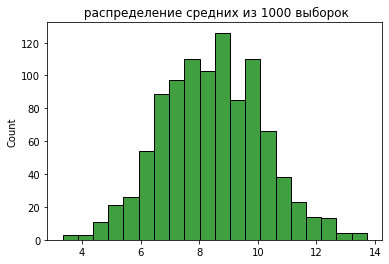

In [115]:
mean_list = []

for i in range(1000):
    data = my.rvs(size = 50)
    mean_list.append(np.mean(data))
    
sns.histplot(mean_list, bins = 20, color='green')
plt.title(' распределение средних из 1000 выборок')
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [30]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [32]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

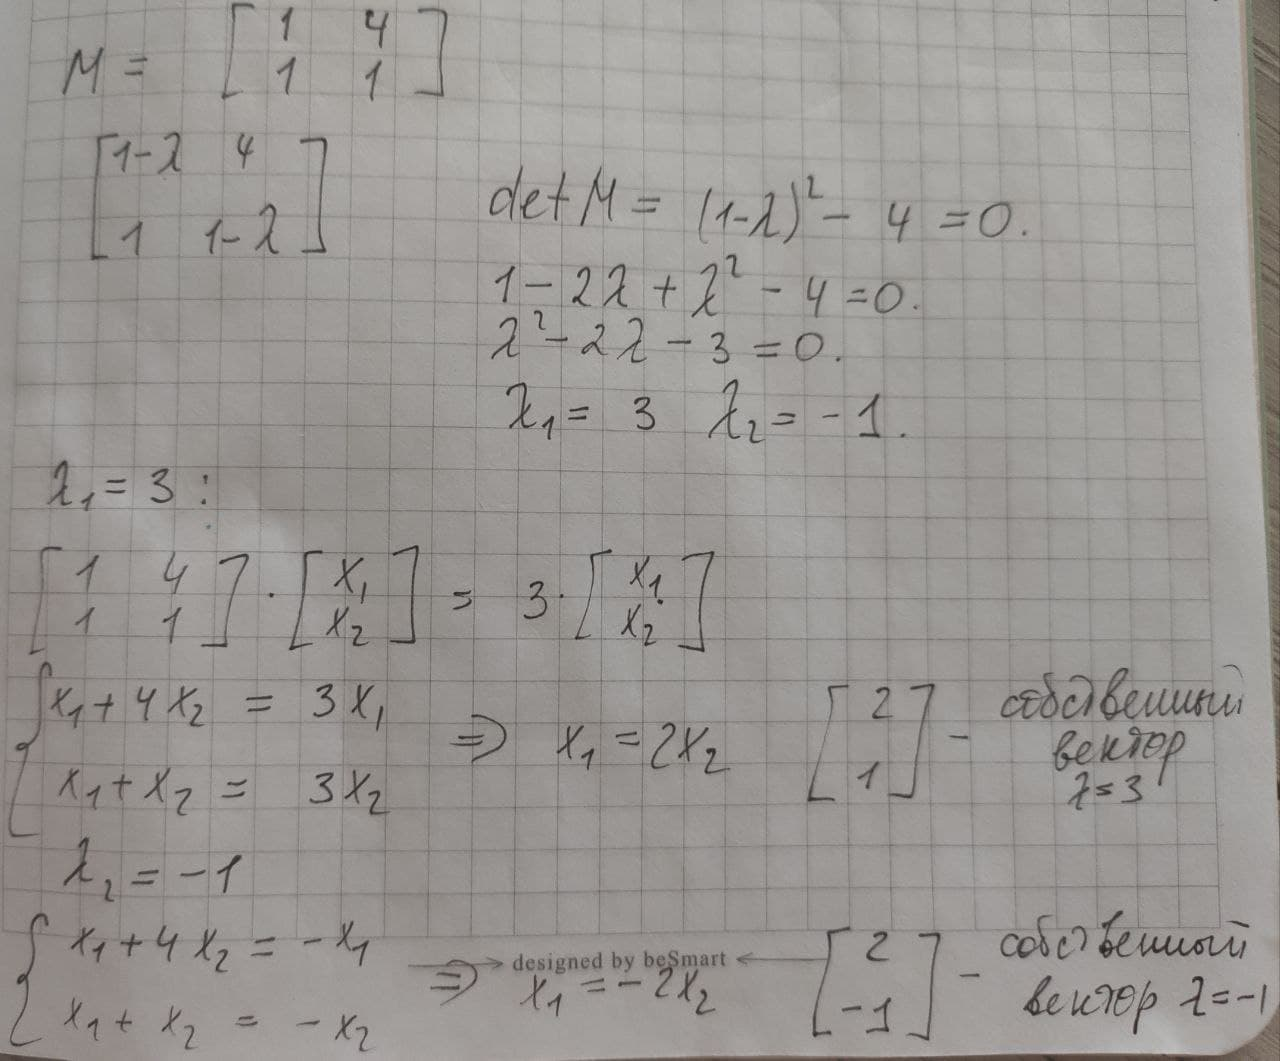

In [33]:
Image(filename = "task_5.jpg", width=500, height=500)